# Ejercicios Modulo 5. Excel y CSV (Enunciado)

Consideraciones a tener en cuenta: 

* Guardar este documento con el siguiente formato para su entrega: __M5_02_nombre_apellido1_apellido2__
* Realizar los ejercicios con las herramientas vistas en las sesiones. 
* Comentar el código
* Utilizar nombres de variables apropiados, si vais a guardar una nota, llamar a esa variable nota, no n o x

__Recomendación:__ Haz una copia de los ficheros antes de empezar a modificarlos para siempre poder recuperar una versión original de los mismos.

## EXCEL

**1) Ejercicio de manejo de Excel en base al fichero 02_Excel_data.xlsx:**
* Abre el fichero Excel
* Lista las hojas que hay
* Crea una nueva hoja que se llame olimpiadas entre ventas y otros
* Vuelve a listar las hojas que hay
* Guarda los cambios y comprueba en el excel si se han efectuado

In [1]:
#*Importaciones necesarias de otros módulos
from datetime import datetime, timedelta
import locale
import copy
from IPython.display import clear_output
import openpyxl

class Colores_RAA:
    NEGRO = '\033[30m'
    ROJO = '\033[31m'
    VERDE = '\033[32m'
    NARANJA = '\033[33m'
    AZUL = '\033[34m'
    MORADO = '\033[35m'
    CIAN = '\033[36m'
    GRISCLARO = '\033[37m'
    GRISOSCURO = '\033[90m'
    ROJOCLARO = '\033[91m'
    VERDECLARO = '\033[92m'
    AMARILLO = '\033[93m'
    AZULCLARO = '\033[94m'
    ROSA = '\033[95m'
    CIANCLARO = '\033[96m'
    FINBLOQUE = '\033[0m'
    NEGRITA = '\033[1m'
    SUBRAYADO = '\033[4m'

In [28]:
wk = openpyxl.load_workbook("02_Excel_data.xlsx")
#*En forma de lista
listaHojas = [sheet.title for sheet in wk.worksheets]
print(listaHojas)

#*formato tabular.
for indice, sheet in enumerate(wk.worksheets):
    print(f"Hoja {indice} --> {sheet.title}")
print('-'*100)

#Insertamos la hoja 'olimpiedas' siempre que no exista.
if 'olimpiadas' not in listaHojas:
    wk.create_sheet("olimpiadas", 2)

for indice, sheet in enumerate(wk.worksheets):
    print(f"Hoja {indice} --> {sheet.title}")

#Salvamos los cambios y cerrarmos el fichero de excel.
wk.save("02_Excel_data.xlsx")
wk.close()

['direcciones', 'ventas', 'otros']
Hoja 0 --> direcciones
Hoja 1 --> ventas
Hoja 2 --> otros
----------------------------------------------------------------------------------------------------
Hoja 0 --> direcciones
Hoja 1 --> ventas
Hoja 2 --> olimpiadas
Hoja 3 --> otros


**2) Continuemos con Excel**
* Crea una lista que contenga los siguientes datos olímpicos (nombre del país y medallas de oro, plata y bronce):
```
USA, 46, 12, 5
China, 38, 20, 7
UK, 29, 7, 7
Russia, 22, 10, 9
South Korea, 13, 3, 2
Germany, 11, 7, 4
```
* Añadir esa lista a la hoja de olimpiadas que creamos en el ejercicio anterior
* Listar por filas y columnas el contenido
* Mover todo el rango de datos una fila hacia abajo (buscar en la documentación como mover rangos)
* Añadir unas cabeceras en la primera línea (que acaba de quedar libre) que sean "Pais", "Oros", "Platas", "Bronces"
* Guarda los cambios y comprueba en el excel si se han efectuado

In [32]:
#Estructura de datos que contiene las medallas ganadas por los distintos paíese."
lista = [{'Pais': 'USA', 'Oros' : 46, 'Platas' : 12, 'Bronces' : 5},
         {'Pais': 'China', 'Oros' : 38, 'Platas' : 20, 'Bronces' : 7},
         {'Pais': 'UK', 'Oros' : 29, 'Platas' : 7, 'Bronces' : 7},
         {'Pais': 'Russia', 'Oros' : 22, 'Platas' : 10, 'Bronces' : 9},
         {'Pais': 'South Korea', 'Oros' : 13, 'Platas' : 3, 'Bronces' : 2},
         {'Pais': 'Germany', 'Oros' : 11, 'Platas' : 7, 'Bronces' : 4}]

In [31]:
from openpyxl.styles import colors, Font, Color
         
#Abrimos el fichero de excel.
wk = openpyxl.load_workbook("02_Excel_data.xlsx")

#En la variable nombreHoja almacemamos la hoja sobre la que queremos operar.
nombreHoja = 'olimpiadas'

#*Borramos la hoja -- Para ello borramos las cinco primeras columnas
wk[nombreHoja].delete_cols(1,5)

#*Escribimos el encabezado de la hoja.
estiloTitulo = Font(name = 'Calibri', color = 'FF0000', size = 16, bold = True, italic = True)
estiloNegrita = Font(name = 'Calibri', bold = True)
estiloNegrita14 = Font(name = 'Calibri', bold = True, size = 14)
wk[nombreHoja]['A1'].value = 'Medallero de no se qué olimpiada:'
wk[nombreHoja]['A1'].font = estiloTitulo


#*Escribimos los datos.
for indice, elemento in enumerate(lista):
    wk[nombreHoja]['A' + str(indice+2)].value = elemento['Pais']
    wk[nombreHoja]['A' + str(indice+2)].font = estiloNegrita
    wk[nombreHoja]['A' + str(indice+2)].value = elemento['Pais']
    wk[nombreHoja]['B' + str(indice+2)].value = elemento['Oros']
    wk[nombreHoja]['C' + str(indice+2)].value = elemento['Platas']
    wk[nombreHoja]['D' + str(indice+2)].value = elemento['Bronces']
    
#*Listamos por filas
rango = wk[nombreHoja]['A2':'D7']
for row in rango:
    for cell in row:
        print(f"{cell.coordinate} - {cell.value}")
    print('_'*20)

print('*'*50)
#*Listamos por columnas - Utilizamos iter_cols de openpyxl
for col in wk[nombreHoja].iter_cols(1,4,2,7):
    for cell in col:
        print(f"{cell.coordinate} - {cell.value}")
    print('-'*25)

#*Movemos el rango una fila hacia abajo.
wk[nombreHoja].move_range('A2:D7', rows = 1, cols = 0)

#*Insertamos los títulos delante de los datos.
for indice, clave in enumerate(lista[0].keys()):
     wk[nombreHoja][chr(65 + indice) + '2'].value = clave
     wk[nombreHoja][chr(65 + indice) + '2'].font = estiloNegrita14
    
wk[nombreHoja]['E2'].value = "Medallas por país"
wk[nombreHoja]['E2'].font = estiloNegrita14
for indice in range(3,9):
    #Elimino esta primera opción porque en excel me pone un =@suma(B3:D3).
    #wk[nombreHoja]['E' + str(indice)] = '=SUMA(B' + str(indice) + ":D" + str(indice) + ')'
    wk[nombreHoja]['E' + str(indice)] = '=B' + str(indice) + "+C" + str(indice) + "+D" + str(indice) 


from openpyxl.chart import BarChart
from openpyxl.chart.marker import DataPoint
from openpyxl.drawing.fill import PatternFillProperties, ColorChoice
# Creacion de la gráfica
grafica = BarChart()
#*Añadimos los datos a representar para cada eje
paises = openpyxl.chart.Reference(wk[nombreHoja], min_col=1, max_col = 1, min_row=3, max_row=8)
numeroMedallas = openpyxl.chart.Reference(wk[nombreHoja], min_col=5, max_col = 5, min_row=3, max_row=8)
#*Datos
grafica.add_data(numeroMedallas, titles_from_data=True)
#*Categoría
grafica.set_categories(paises)
#Configuración del gráfico
grafica.title = "Medallas por país"
grafica.type = "col"
grafica.style = 10
grafica.x_axis.title = "Paises"
grafica.y_axis.title = "Número total de medallas"
#*Cambia el color de todas las barras
grafica.series[0].graphicalProperties.solidFill = '0000FF'
#*Cambio de color por cada uno de los dataPoints
colores = ['000FF', '008080', '808080', '800000', 'FF0000', '008000']
for indice in range(5):
    barra = DataPoint(idx = indice)
    barra.graphicalProperties.solidFill = colores[indice]
    grafica.series[0].dPt.append(barra)
grafica.shape = 4
#Añadimos el gráfico configurado a la hoja cuyo nombre está almacenado en la variable nombreHoja.
wk[nombreHoja].add_chart(grafica, "D12")


#*Salvamos y cerramos el libro de excel.
wk.save("02_Excel_data.xlsx")
wk.close()

A2 - USA
B2 - 46
C2 - 12
D2 - 5
____________________
A3 - China
B3 - 38
C3 - 20
D3 - 7
____________________
A4 - UK
B4 - 29
C4 - 7
D4 - 7
____________________
A5 - Russia
B5 - 22
C5 - 10
D5 - 9
____________________
A6 - South Korea
B6 - 13
C6 - 3
D6 - 2
____________________
A7 - Germany
B7 - 11
C7 - 7
D7 - 4
____________________
**************************************************
A2 - USA
A3 - China
A4 - UK
A5 - Russia
A6 - South Korea
A7 - Germany
-------------------------
B2 - 46
B3 - 38
B4 - 29
B5 - 22
B6 - 13
B7 - 11
-------------------------
C2 - 12
C3 - 20
C4 - 7
C5 - 10
C6 - 3
C7 - 7
-------------------------
D2 - 5
D3 - 7
D4 - 7
D5 - 9
D6 - 2
D7 - 4
-------------------------


**3) Continuemos con Excel, centrandonos en la parte de la librería openpyxl.styles (la cual proporciona estilo a nuestras hojas de Excel)**
* Poner las cabeceras que acabamos de añadir en negrita (bold)
* Guarda los cambios y comprueba en el excel si se han efectuado

Pista: Aunque hay varias formas de hacerlo, lo más común es definir el estilo que deseas (negrita) y luego aplicárselo a todas las celdas que quieras (iterar por la primera fila de nuestra hoja)

Doc: https://openpyxl.readthedocs.io/en/stable/styles.html

In [80]:
#*Resuelto en el punto anterior a la vez que se generaban los datos en la excel.

**4) Continuamos con Excel. Crea una nueva columna que sea el sumatorio de todas las medallas conseguidas por cada uno de los paises**

In [ ]:
#*Resuelto más arriba antes de cerrar el fichero de excel.

**5) Continuamos con Excel. Crear un gráfico de barras (openpyxl.chart.BarChart()) lo más parecido al que se muestra en la imagen:**

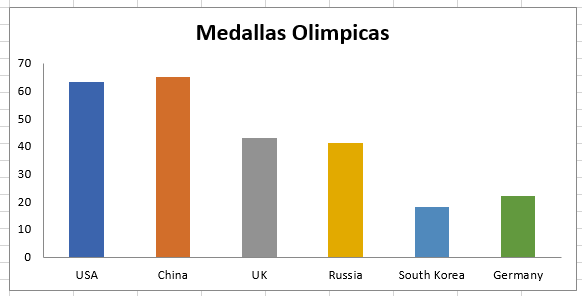

In [ ]:
import openpyxl
data = openpyxl.chart.Reference(hoja_olimpiadas, min_col=5, min_row=2, max_col=5, max_row=7)
categs = openpyxl.chart.Reference(hoja_olimpiadas, min_col=1, min_row=2, max_row=7)

# Resuelto más arriba antes de cerrar el fichero de Excel.

## CSV

**Vamos a realizar un ejercicio práctico de minería de datos, donde limpiaremos y filtraremos información con un csv que contiene datos de vehículos**

Trabajaremos con el fichero **02_CSV_data.csv**

**6) Observa los datos del csv y realiza las siguientes tareas:**

* Tenemos 9 columnas, las 8 primeras contienen datos numéricos con los cuales podemos trabajar, crea una lista para cada una de estas columnas (mpg, cylinders, etc.). No es necesario crear lista para name
* Recorre los datos del csv adecuadamente y almacena los datos de cada columna en cada una de las listas que has creado anteriormente.
* Comprobar que se haya guardado en las listas la información correspondiente (con prints)

In [ ]:
#Opcion 1: Leyendo un fichero plano, sin aprovechar el módulo csv

import operator
#Abrimos el fichero y leemos todas sus líneas en una variable llamada datos.
fichero = open('02_CSV_data.csv', 'r', encoding = 'utf8')
datos = fichero.readlines()
fichero.close()
lineas = len(datos) - 1
#Generamos una lista con los encabezados de las columnas para su uso a partir de ahora para referencias.
encabezados = [datos[0][:-1].split(',')[p] for p in range(len(datos[0].split(',')))]
listaDatos = []
datoPorLinea = 9
contadorOK = 0 
for numLinea, dato in enumerate(datos):
    if numLinea > 0:
        #*Si no se tienen los 9 datos, descartamos la línea
        if len(dato.split(',')) == 9:
            dictDatos = {}
            for r in range(9):
                if r != 8:
                    dictDatos[encabezados[r]] = float(dato[:-1].split(',')[r])
                else:
                    dictDatos[encabezados[r]] = dato[:-1].split(',')[r]
            listaDatos.append(dictDatos) 
            contadorOK += 1
print(f"Se ha procesado correctamente {contadorOK} de {lineas}")
#Ordenamos listaDatos por el parámetro weight.
listaDatos = sorted(listaDatos, key = operator.itemgetter('weight'), reverse = True)
#Impresión del resultado por pantalla.
for indice, dato in enumerate(listaDatos):
    print(f"Registro {indice + 1} --> {dato}")



In [219]:
#Opcion 2: Utilizando el módulo csv
import csv
import operator
listaDatos2 = []
with open('02_CSV_data.csv') as fichero:
    reader = csv.DictReader(fichero)
    for registro in reader:
        listaDatos2.append(registro)
        
print(f"Se ha procesado correctamente {len(listaDatos2)} registros. La lista genrada no tiene encabezados.")
for registro in listaDatos2:
    print(registro)

Se ha procesado correctamente 397 registros. La lista genrada no tiene encabezados.
{'mpg': '18', 'cylinders': '8', 'displacement': '307', 'horsepower': '130', 'weight': '3504', 'acceleration': '12', 'year': '70', 'origin': '1', 'name': 'chevrolet chevelle malibu'}
{'mpg': '15', 'cylinders': '8', 'displacement': '350', 'horsepower': '165', 'weight': '3693', 'acceleration': '11.5', 'year': '70', 'origin': '1', 'name': 'buick skylark 320'}
{'mpg': '18', 'cylinders': '8', 'displacement': '318', 'horsepower': '150', 'weight': '3436', 'acceleration': '11', 'year': '70', 'origin': '1', 'name': 'plymouth satellite'}
{'mpg': '16', 'cylinders': '8', 'displacement': '304', 'horsepower': '150', 'weight': '3433', 'acceleration': '12', 'year': '70', 'origin': '1', 'name': 'amc rebel sst'}
{'mpg': '17', 'cylinders': '8', 'displacement': '302', 'horsepower': '140', 'weight': '3449', 'acceleration': '10.5', 'year': '70', 'origin': '1', 'name': 'ford torino'}
{'mpg': '15', 'cylinders': '8', 'displaceme

**7) Vamos a trabajar con los números de nuestras listas por lo que nos sobra el primer elemento de cada lista, el cual contiene el nombre de cada una de las columnas.**

* Elimina el primer elemento de cada una de las listas
* Observa que los datos de nuestras listas son strings, conviértelos a float. Pista: list y map te pueden ayudar.
* Comprobar que se haya eliminado el primer elemento y que los datos son numéricos (con prints)

In [220]:
# No es necesario eliminar los encabezados, ya que se ha hecho en el apartado anterior.
def pasaraFloat(elemento : dict) -> None:
    """Función que pasa a float los valores de la tabla.
    Args:
        elemento (dict): Diccionario que contiene un registro de datos.
    Returns:
        elemento (dict): Diccionario con los elementos cambiados de str a float. 
    """
    for encabezado in elemento.keys():
        if encabezado != 'name':
            elemento[encabezado] = float(elemento[encabezado])
    return elemento
    
print(f"Lista con strings: {listaDatos2[:5]}")  
listaDatos2 = list(map(pasaraFloat, listaDatos2))
print(f"Lista con floats: {listaDatos2[:5]}")  



Lista con strings: [{'mpg': '18', 'cylinders': '8', 'displacement': '307', 'horsepower': '130', 'weight': '3504', 'acceleration': '12', 'year': '70', 'origin': '1', 'name': 'chevrolet chevelle malibu'}, {'mpg': '15', 'cylinders': '8', 'displacement': '350', 'horsepower': '165', 'weight': '3693', 'acceleration': '11.5', 'year': '70', 'origin': '1', 'name': 'buick skylark 320'}, {'mpg': '18', 'cylinders': '8', 'displacement': '318', 'horsepower': '150', 'weight': '3436', 'acceleration': '11', 'year': '70', 'origin': '1', 'name': 'plymouth satellite'}, {'mpg': '16', 'cylinders': '8', 'displacement': '304', 'horsepower': '150', 'weight': '3433', 'acceleration': '12', 'year': '70', 'origin': '1', 'name': 'amc rebel sst'}, {'mpg': '17', 'cylinders': '8', 'displacement': '302', 'horsepower': '140', 'weight': '3449', 'acceleration': '10.5', 'year': '70', 'origin': '1', 'name': 'ford torino'}]
Lista con floats: [{'mpg': 18.0, 'cylinders': 8.0, 'displacement': 307.0, 'horsepower': 130.0, 'weight

**8) Para terminar vamos a mostrar algunos resultados. Para ello utilizaremos la librería statistics.**

* Muestra para cada una de las listas, cuantas observaciones tiene (cuántos datos tiene).
* Mostrar el mínimo y el máximo de cada lista
* Mostrar la media, mediana y desviación estándar de cada lista (utilizando statistics)

In [221]:
import statistics as stats

def generaLista(listaDatos: dict, tipo : str) -> list:
    """Función que devuelve una lista con los datos del tipo que se le pasan como parámetros de entre los que forman el dataset que se le pasa.
    Args:
        listaDatos (dict): Conjunto de datos sobre los que se opera.
        tipo (str): tipo de datos a extraer

    Returns:
        list: lista en la que se devuelven los datos del tipo seleccionado
    """
    listasalida = []
    for elemento in listaDatos:
        listasalida.append(elemento[tipo])
    return listasalida


# Imprimimos los datos del dataset.
print(f"El número de muestras es: {len(listaDatos2)} registros y cada registro contie {len(listaDatos2[0].keys())} datos, que son:\n\t- {str(listaDatos2[0].keys())[11:-2]}\n haciendo un total de\
 {len(listaDatos2)* len(listaDatos2[0].keys())} datos. ")


#Imprimimos los datos estadísticos para todas las variables excepto el nombre, que lo eliminamos con un slicing de los encabezados.
for tipo in encabezados[:-1]:
    print('-'*60)
    print(f"La media para {tipo} es {stats.mean(generaLista(listaDatos2, tipo)):.2f}")
    print(f"La mediana para {tipo} es {stats.median(generaLista(listaDatos2, tipo)):.2f}")
    print(f"La desviación estandar para {tipo} es {stats.stdev(generaLista(listaDatos2, tipo)):.2f}")
    print('-'*60)

El número de muestras es: 397 registros y cada registro contie 9 datos, que son:
	- 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name'
 haciendo un total de 3573 datos. 
------------------------------------------------------------
La media para mpg es 23.52
La mediana para mpg es 23.00
La desviación estandar para mpg es 7.83
------------------------------------------------------------
------------------------------------------------------------
La media para cylinders es 5.46
La mediana para cylinders es 4.00
La desviación estandar para cylinders es 1.70
------------------------------------------------------------
------------------------------------------------------------
La media para displacement es 193.53
La mediana para displacement es 146.00
La desviación estandar para displacement es 104.38
------------------------------------------------------------
------------------------------------------------------------
La media para hors